<a href="https://colab.research.google.com/github/minjeon99/ESAA-10th/blob/Summer-Project/ESAA_YB_3%EC%A1%B0_%EC%97%AC%EB%A6%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%B3%B4%EA%B3%A0%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

# Data Loading

## 개별 데이터

### 연령
- 0~9세: 아동
- 10~19세: 청소년
- 20~34세: 청년
- 35~49세: 중년
- 50~64세: 장년
- 65세 이상: 노년

In [ ]:
# 원본 데이터
age_df = pd.read_csv('/content/등록인구(연령별_동별)_20240704120016.csv', header=1)
print(age_df.shape)
age_df.head()

(25, 24)


,동별(1),항목,합계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
0,종로구,계,150550,2470,3689,4706,5594,12369,15016,11892,...,11921,11671,9655,6332,5379,4342,2357,804,218,40
1,중구,계,131812,2822,3162,3123,3578,8285,12795,12826,...,10044,10130,8971,5931,4774,3749,1948,722,177,30
2,용산구,계,223433,5327,6536,6959,7667,12169,19182,22208,...,16855,16312,13471,8796,6996,5571,3308,1167,297,65
3,성동구,계,284258,7811,8917,8343,9859,18941,25208,24872,...,21832,21469,17637,11516,9139,6942,3512,1079,228,45
4,광진구,계,350925,6361,9015,11437,13140,27053,39199,33132,...,26592,25699,21124,13585,10439,7407,3699,1178,282,54


In [ ]:
age = age_df.copy()

# 불필요한 컬럼 drop
age.rename(columns = {'동별(1)': "자치구",'합계':'인구수'}, inplace=True)
age.drop(columns=['항목'], axis=1, inplace=True)

# 연령대 범주화
age['아동'] = age.iloc[:,2:4].apply(lambda x:x.sum(), axis=1)
age['청소년'] = age.iloc[:,4:6].apply(lambda x:x.sum(), axis=1)
age['청년'] = age.iloc[:,6:9].apply(lambda x:x.sum(), axis=1)
age['중년'] = age.iloc[:,9:12].apply(lambda x:x.sum(), axis=1)
age['장년'] = age.iloc[:,12:15].apply(lambda x:x.sum(), axis=1)
age['노년'] = age.iloc[:,15:23].apply(lambda x:x.sum(), axis=1)
age = pd.concat([age.iloc[:,:2],age.iloc[:,-6:]],axis=1)

# 자치구 인덱스 설정
age.set_index('자치구', inplace=True)

# 최종 데이터 생성
age.to_csv('구별 연령_2024_new.csv')
age.head()

,인구수,아동,청소년,청년,중년,장년,노년
자치구,,,,,,,
종로구,150550,6159,10300,39277,29374,36313,29127
중구,131812,5984,6701,33906,28479,30440,26302
용산구,223433,11863,14626,53559,51803,51911,39671
성동구,284258,16728,18202,69021,63539,66670,50098
광진구,350925,15376,24577,99384,73395,80425,57768


### 가구원수
-  3인~7인 이상: 3인이상

In [ ]:
# 원본 데이터
household_df = pd.read_csv('/content/가구원수별+가구-+읍면동(연도+끝자리+0,5),+시군구(그+외+연도)_20240704094754.csv', header=2, names=['자치구','가구수','1인','2인','3인','4인','5인','6인','7인이상','평균 가구원수'])
print(household_df.shape)
household_df.head()

(25, 10)


,자치구,가구수,1인,2인,3인,4인,5인,6인,7인이상,평균 가구원수
합계,종로구,64422,28424,16471,10570,6943,1585,357,72,2.0
합계,중구,56260,25247,15189,8952,5344,1194,263,71,2.0
합계,용산구,98483,41437,26780,16985,10360,2355,471,95,2.1
합계,성동구,122873,46548,32508,24157,15862,3035,622,141,2.2
합계,광진구,156463,69391,37683,26349,18431,3689,744,176,2.1


In [ ]:
household = household_df.copy()

# 컬럼 정리
household['3인이상'] = household.iloc[:,4:9].apply(lambda x:x.sum(), axis=1)
household.drop(columns=['3인','4인','5인','6인','7인이상'], inplace=True)
household = household[['자치구','1인','2인','3인이상','평균 가구원수','가구수']]

# 자치구 인덱스 설정
household.reset_index(drop=True, inplace=True)
household.set_index('자치구', inplace=True)

# 최종 데이터 생성
household.to_csv('구별 가구원수_2022_new.csv')
household.head()

,1인,2인,3인이상,평균 가구원수,가구수
자치구,,,,,
종로구,28424,16471,19527,2.0,64422
중구,25247,15189,15824,2.0,56260
용산구,41437,26780,30266,2.1,98483
성동구,46548,32508,43817,2.2,122873
광진구,69391,37683,49389,2.1,156463


### 성별

In [ ]:
# 원본 데이터
gender_df = pd.read_csv('/content/등록인구_20240704120801.csv', header=2)
print(gender_df.shape)
gender_df.head()

(26, 8)


,동별(1),동별(2),소계,소계.1,남자,여자,소계.2,소계.3
0,합계,소계,4485819,9635445,4644729,4990716,2.09,1768948
1,합계,종로구,72404,150550,71861,78689,1.93,29127
2,합계,중구,65132,131812,63506,68306,1.87,26302
3,합계,용산구,106272,223433,107837,115596,1.97,39671
4,합계,성동구,133374,284258,137288,146970,2.08,50098


In [ ]:
gender = gender_df.copy()

# 필요 컬럼만 추출
gender = gender[['동별(2)','남자','여자']]
gender = gender.rename(columns={'동별(2)':'자치구'})
gender.drop(index=[0], axis=0, inplace=True)

# 자치구 인덱스 설정
gender.reset_index(drop=True, inplace=True)
gender.set_index('자치구', inplace=True)

# 최종 데이터 생성
gender.to_csv('구별 성별_2024_new.csv')
gender.head()

,남자,여자
자치구,,
종로구,71861,78689
중구,63506,68306
용산구,107837,115596
성동구,137288,146970
광진구,167245,183680


### 평균비용/방문횟수

In [ ]:
lst=['평균비용', '방문횟수']
for i in lst:
    year=2019
    for j in range(4):
        df=pd.read_csv(file_path+'문화활동+연간+'+str(i)+'_'+str(year)+'.csv')
        df.set_index('구분별(2)', inplace=True)
        df.sort_index(inplace=True)
        df.index.name='자치구'
        df.columns=['전시회','박물관','음악무용','전통예술','연극','영화','대중공연','스포츠']
        df.to_csv(file_path+'문화활동_'+str(i)+'_'+str(year)+'.csv')
        year += 1

In [ ]:
lst=['평균비용', '방문횟수']
for i in lst:
    df=pd.read_csv(file_path+'문화활동+연간+'+str(i)+'_2023.csv')
    df.set_index('구분별(2)', inplace=True)
    df.sort_index(inplace=True)
    df.index.name='자치구'
    df.columns=['전시회','박물관','음악무용','전통예술','연극','영화','대중공연','스포츠','문학']
    df.to_csv(file_path+'문화활동_'+str(i)+'_2023.csv')

In [ ]:
cost1=pd.read_csv(file_path+'문화활동_평균비용_2023.csv',usecols=['자치구','전시회','박물관','음악무용','전통예술','연극','대중공연'])
cost2=pd.read_csv(file_path+'문화활동_평균비용_2022.csv',usecols=['자치구','전시회','박물관','음악무용','전통예술','연극','대중공연'])
cost3=pd.read_csv(file_path+'문화활동_평균비용_2021.csv',usecols=['자치구','전시회','박물관','음악무용','전통예술','연극','대중공연'])
visit1=pd.read_csv(file_path+'문화활동_방문횟수_2023.csv',usecols=['자치구','전시회','박물관','음악무용','전통예술','연극','대중공연'])
visit2=pd.read_csv(file_path+'문화활동_방문횟수_2022.csv',usecols=['자치구','전시회','박물관','음악무용','전통예술','연극','대중공연'])
visit3=pd.read_csv(file_path+'문화활동_방문횟수_2021.csv',usecols=['자치구','전시회','박물관','음악무용','전통예술','연극','대중공연'])

costs=[cost1,cost2,cost3]
visits=[visit1,visit2,visit3]
cols=list(visit1.columns[1:])

for year in costs:
    year.replace('-',0, inplace=True)
    year[cols]=year[cols].astype('int')

for visit in visits:
    visit.replace('-',0, inplace=True)
    visit[cols]=visit[cols].astype('float')

# 도봉구 결측치 처리
cost1.iloc[9,3]=cost1['음악무용'].median()
cost1.iloc[9,4]=cost1['전통예술'].median()
visit1.iloc[9,2]=visit1['대중공연'].median()


# 3개년 평균으로 최종 데이터 생성
cost=pd.DataFrame()
visit=pd.DataFrame()
for col in cols:
    cost[col]=(cost1[col]+cost2[col]+cost3[col])/3
    visit[col]=(visit1[col]+visit2[col]+visit3[col])/3

visit=np.round(visit,3)
cost=np.round(cost,0)

acv=pd.DataFrame()
acv['자치구']=cost1['자치구']
acv=pd.concat([acv,cost,visit], axis=1)
acv.set_index('자치구', inplace=True)
acv.columns=['전시회비용','박물관비용','음악무용비용','전통예술비용','연극비용','대중비용','전시회방문','박물관방문','음악무용방문','전통예술방문','연극방문','대중방문']
acv.to_csv(file_path+'연간 문화 평균비용 및 방문횟수.csv')

,전시회비용,박물관비용,음악무용비용,전통예술비용,연극비용,대중비용,전시회방문,박물관방문,음악무용방문,전통예술방문,연극방문,대중방문
자치구,,,,,,,,,,,,
강남구,28764.0,23827.0,129683.0,31504.0,110781.0,117785.0,0.247,0.177,0.157,0.073,0.333,0.197
강동구,35105.0,30200.0,88347.0,20122.0,69705.0,106183.0,0.113,0.157,0.047,0.037,0.200,0.120
강북구,25653.0,32965.0,43299.0,14535.0,71109.0,81743.0,0.093,0.103,0.030,0.067,0.140,0.080
강서구,33677.0,15337.0,95360.0,20156.0,87281.0,69851.0,0.110,0.107,0.040,0.023,0.133,0.080
관악구,32811.0,10578.0,115446.0,15042.0,106697.0,89949.0,0.130,0.143,0.033,0.033,0.210,0.077


## 데이터 병합

In [ ]:
# 문화시설 수
facility = pd.read_csv('/content/2022 자치구별 문화시설(공연장, 전시시설) 개수.csv').rename(columns={'합계':'문화시설수'})
print(facility.shape)
facility.head()

(25, 4)


,자치구,전시시설,공연장,문화시설수
0,종로구,53,167,220
1,중구,17,29,46
2,용산구,11,14,25
3,성동구,5,10,15
4,광진구,3,14,17


In [ ]:
# 가구원 수
household = pd.read_csv('/content/구별 가구원수_2022_new.csv')
print(household.shape)
household.head()

(25, 6)


,자치구,1인,2인,3인이상,평균 가구원수,가구수
0,종로구,28424,16471,19527,2.0,64422
1,중구,25247,15189,15824,2.0,56260
2,용산구,41437,26780,30266,2.1,98483
3,성동구,46548,32508,43817,2.2,122873
4,광진구,69391,37683,49389,2.1,156463


In [ ]:
# 성비
gender = pd.read_csv('/content/구별 성별_2024_new.csv')
print(gender.shape)
gender.head()

(25, 3)


,자치구,남자,여자
0,종로구,71861,78689
1,중구,63506,68306
2,용산구,107837,115596
3,성동구,137288,146970
4,광진구,167245,183680


In [ ]:
# 연령
age = pd.read_csv('/content/구별 연령_2024_new.csv')
print(age.shape)
age.head()

(25, 8)


,자치구,인구수,아동,청소년,청년,중년,장년,노년
0,종로구,150550,6159,10300,39277,29374,36313,29127
1,중구,131812,5984,6701,33906,28479,30440,26302
2,용산구,223433,11863,14626,53559,51803,51911,39671
3,성동구,284258,16728,18202,69021,63539,66670,50098
4,광진구,350925,15376,24577,99384,73395,80425,57768


In [ ]:
# 문화 비용 및 방문 횟수
vst_cst = pd.read_csv('/content/연간 문화 평균비용 및 방문횟수.csv')
print(vst_cst.shape)
vst_cst.head()

(25, 13)


,자치구,전시회비용,박물관비용,음악무용비용,전통예술비용,연극비용,대중비용,전시회방문,박물관방문,음악무용방문,전통예술방문,연극방문,대중방문
0,강남구,28764.0,23827.0,129683.0,31504.0,110781.0,117785.0,0.247,0.177,0.157,0.073,0.333,0.197
1,강동구,35105.0,30200.0,88347.0,20122.0,69705.0,106183.0,0.113,0.157,0.047,0.037,0.200,0.120
2,강북구,25653.0,32965.0,43299.0,14535.0,71109.0,81743.0,0.093,0.103,0.030,0.067,0.140,0.080
3,강서구,33677.0,15337.0,95360.0,20156.0,87281.0,69851.0,0.110,0.107,0.040,0.023,0.133,0.080
4,관악구,32811.0,10578.0,115446.0,15042.0,106697.0,89949.0,0.130,0.143,0.033,0.033,0.210,0.077


In [ ]:
# 소득
income = pd.read_csv('/content/자치구 단위 소득 구간대별 주민비율.csv').drop(columns=['Unnamed: 0'])
income['자치구'] = income['자치구'].str.strip()
income = income.replace({'동대문':'동대문구','서대문':'서대문구','영등포':'영등포구'})
print(income.shape)
income.head()

(25, 8)


,자치구,2천만원,3천만원,4천만원,5천만원,6천만원,7천만원,7천만원 이상
0,강남구,0.08,0.27,0.21,0.13,0.07,0.05,0.18
1,강동구,0.09,0.34,0.26,0.13,0.06,0.04,0.08
2,강북구,0.14,0.41,0.25,0.10,0.04,0.02,0.03
3,강서구,0.10,0.34,0.26,0.13,0.06,0.04,0.07
4,관악구,0.12,0.40,0.26,0.11,0.05,0.02,0.04


In [ ]:
# 데이터 병합
from functools import reduce

full_df = reduce(lambda x, y : pd.merge(x,y,on='자치구'), [vst_cst,facility,age,gender,household,income])
print(full_df.columns)
print(full_df.shape)
full_df = full_df.set_index('자치구')
full_df

Index(['자치구', '전시회비용', '박물관비용', '음악무용비용', '전통예술비용', '연극비용', '대중비용', '전시회방문',
       '박물관방문', '음악무용방문', '전통예술방문', '연극방문', '대중방문', '전시시설', '공연장', '문화시설수',
       '인구수', '아동', '청소년', '청년', '중년', '장년', '노년', '남자', '여자', '1인', '2인',
       '3인이상', '평균 가구원수', '가구수', '2천만원', '3천만원', '4천만원', '5천만원', '6천만원',
       '7천만원', '7천만원 이상'],
      dtype='object')
(25, 37)


,전시회비용,박물관비용,음악무용비용,전통예술비용,연극비용,대중비용,전시회방문,박물관방문,음악무용방문,전통예술방문,...,3인이상,평균 가구원수,가구수,2천만원,3천만원,4천만원,5천만원,6천만원,7천만원,7천만원 이상
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,28764.0,23827.0,129683.0,31504.0,110781.0,117785.0,0.247,0.177,0.157,0.073,...,84548,2.3,212499,0.08,0.27,0.21,0.13,0.07,0.05,0.18
강동구,35105.0,30200.0,88347.0,20122.0,69705.0,106183.0,0.113,0.157,0.047,0.037,...,76924,2.3,187615,0.09,0.34,0.26,0.13,0.06,0.04,0.08
강북구,25653.0,32965.0,43299.0,14535.0,71109.0,81743.0,0.093,0.103,0.030,0.067,...,43195,2.1,131275,0.14,0.41,0.25,0.10,0.04,0.02,0.03
강서구,33677.0,15337.0,95360.0,20156.0,87281.0,69851.0,0.110,0.107,0.040,0.023,...,85777,2.1,254540,0.10,0.34,0.26,0.13,0.06,0.04,0.07
관악구,32811.0,10578.0,115446.0,15042.0,106697.0,89949.0,0.130,0.143,0.033,0.033,...,57693,1.8,260075,0.12,0.40,0.26,0.11,0.05,0.02,0.04
광진구,27828.0,17098.0,101183.0,48668.0,100146.0,107396.0,0.180,0.110,0.073,0.043,...,49389,2.1,156463,0.13,0.38,0.24,0.11,0.05,0.03,0.06
구로구,13201.0,7934.0,37341.0,9196.0,65687.0,41349.0,0.113,0.127,0.037,0.040,...,62886,2.2,169228,0.13,0.39,0.24,0.11,0.05,0.03,0.05
금천구,22067.0,14789.0,28435.0,15781.0,55683.0,56163.0,0.133,0.087,0.033,0.033,...,32165,2.0,110689,0.14,0.41,0.25,0.11,0.05,0.02,0.03
노원구,24158.0,11803.0,60940.0,15610.0,94639.0,66238.0,0.093,0.057,0.030,0.033,...,85106,2.3,205078,0.13,0.34,0.25,0.12,0.06,0.03,0.06


In [ ]:
# 최종 데이터 생성
full_df.to_csv('서울시 공연예술 소비(최최종).csv')

# Preprocessing

In [ ]:
seoul_df = pd.read_csv('/content/서울시 공연예술 소비(최최종).csv', index_col=0)
print(seoul_df.shape)
print(seoul_df.columns)
seoul_df.head()

(25, 36)
Index(['전시회비용', '박물관비용', '음악무용비용', '전통예술비용', '연극비용', '대중비용', '전시회방문', '박물관방문',
       '음악무용방문', '전통예술방문', '연극방문', '대중방문', '전시시설', '공연장', '문화시설수', '인구수', '아동',
       '청소년', '청년', '중년', '장년', '노년', '남자', '여자', '1인', '2인', '3인이상',
       '평균 가구원수', '가구수', '2천만원', '3천만원', '4천만원', '5천만원', '6천만원', '7천만원',
       '7천만원 이상'],
      dtype='object')


,전시회비용,박물관비용,음악무용비용,전통예술비용,연극비용,대중비용,전시회방문,박물관방문,음악무용방문,전통예술방문,...,3인이상,평균 가구원수,가구수,2천만원,3천만원,4천만원,5천만원,6천만원,7천만원,7천만원 이상
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,28764.0,23827.0,129683.0,31504.0,110781.0,117785.0,0.247,0.177,0.157,0.073,...,84548,2.3,212499,0.08,0.27,0.21,0.13,0.07,0.05,0.18
강동구,35105.0,30200.0,88347.0,20122.0,69705.0,106183.0,0.113,0.157,0.047,0.037,...,76924,2.3,187615,0.09,0.34,0.26,0.13,0.06,0.04,0.08
강북구,25653.0,32965.0,43299.0,14535.0,71109.0,81743.0,0.093,0.103,0.030,0.067,...,43195,2.1,131275,0.14,0.41,0.25,0.10,0.04,0.02,0.03
강서구,33677.0,15337.0,95360.0,20156.0,87281.0,69851.0,0.110,0.107,0.040,0.023,...,85777,2.1,254540,0.10,0.34,0.26,0.13,0.06,0.04,0.07
관악구,32811.0,10578.0,115446.0,15042.0,106697.0,89949.0,0.130,0.143,0.033,0.033,...,57693,1.8,260075,0.12,0.40,0.26,0.11,0.05,0.02,0.04


In [ ]:
seoul = seoul_df.copy()

## 문화 참여도 변수 생성
- 문화생활별 (평균 비용) * (방문 횟수) = (참여도)

In [ ]:
col_names = ['전시','박물관','음악무용','전통예술','연극','대중']
i=0

for name in col_names:
  seoul[name] = seoul.iloc[:,i].mul(seoul.iloc[:,i+6])
  i+=1

# 필요 없는 중복 칼럼들 drop
seoul.drop(seoul.iloc[:,0:12], axis=1, inplace=True)
seoul.drop(columns=['문화시설수'],inplace=True)

print(seoul.columns)
seoul[['전시', '박물관', '음악무용', '전통예술', '연극', '대중']].head()

Index(['전시시설', '공연장', '인구수', '아동', '청소년', '청년', '중년', '장년', '노년', '남자', '여자',
       '1인', '2인', '3인이상', '평균 가구원수', '가구수', '2천만원', '3천만원', '4천만원', '5천만원',
       '6천만원', '7천만원', '7천만원 이상', '전시', '박물관', '음악무용', '전통예술', '연극', '대중'],
      dtype='object')


,전시,박물관,음악무용,전통예술,연극,대중
자치구,,,,,,
강남구,7104.708,4217.379,20360.231,2299.792,36890.073,23203.645
강동구,3966.865,4741.400,4152.309,744.514,13941.000,12741.960
강북구,2385.729,3395.395,1298.970,973.845,9955.260,6539.440
강서구,3704.470,1641.059,3814.400,463.588,11608.373,5588.080
관악구,4265.430,1512.654,3809.718,496.386,22406.370,6926.073


## 인구수/가구수 대비 비율로 변환
- '아동'~'노년', '남자', '여자' 칼럼의 단위: (명)
- '1인', '2인', '3인이상' 칼럼의 단위: (가구)
- 위 칼럼의 값을 전체 자치구별 인구/가구수에서 **특정 인구/가구수가 차지하는 비율**로 변경
  - 자치구별 인구/가구수에 영향을 받지 않게 하기 위함
- '남자' 칼럼 drop
  - '남자' = 1 - '여자'

In [ ]:
# 인구수 대비 비율
seoul.iloc[:,3:11] = seoul.iloc[:,3:11].apply(lambda x:x/seoul['인구수'])

# 남자 칼럼 drop
seoul.drop(columns=['남자'], inplace=True)

# 가구수 대비 비율
seoul[['1인','2인','3인이상']] = seoul[['1인','2인','3인이상']].apply(lambda x: x/seoul['가구수'])
seoul.drop(columns=['가구수'], inplace=True)

print(seoul.columns)
seoul[['아동', '청소년', '청년', '중년', '장년', '노년', '1인', '2인', '3인이상']].head()

Index(['전시시설', '공연장', '인구수', '아동', '청소년', '청년', '중년', '장년', '노년', '여자', '1인',
       '2인', '3인이상', '평균 가구원수', '2천만원', '3천만원', '4천만원', '5천만원', '6천만원', '7천만원',
       '7천만원 이상', '전시', '박물관', '음악무용', '전통예술', '연극', '대중'],
      dtype='object')


,아동,청소년,청년,중년,장년,노년,1인,2인,3인이상
자치구,,,,,,,,,
강남구,0.060925,0.112603,0.200268,0.251717,0.216083,0.158404,0.346256,0.255869,0.397875
강동구,0.066579,0.084981,0.199573,0.234948,0.232506,0.181412,0.318482,0.271508,0.410010
강북구,0.038916,0.065888,0.203918,0.191432,0.261779,0.238067,0.389518,0.281440,0.329042
강서구,0.054114,0.073449,0.235897,0.229560,0.223920,0.183062,0.395596,0.267416,0.336988
관악구,0.033038,0.051361,0.342501,0.195482,0.203954,0.173665,0.559196,0.218971,0.221832


## 소득 범주화
- 2천만원: '소득_하위'
- 3천만원~4천만원: '소득_중위'
- 5천만원~7천만원 이상: '소득_하위'

In [ ]:
seoul.rename(columns={'2천만원':'소득_하위'}, inplace=True)
seoul.insert(loc=15,column='소득_중위', value=seoul[['3천만원','4천만원']].apply(lambda x: x.sum(), axis=1))
seoul.insert(loc=16,column='소득_상위', value=seoul[['5천만원','6천만원','7천만원','7천만원 이상']].apply(lambda x: x.sum(), axis=1))
seoul.drop(columns=['3천만원','4천만원','5천만원','6천만원','7천만원','7천만원 이상'], inplace=True)

print(seoul.columns)
seoul[['소득_하위', '소득_중위', '소득_상위']].head()

Index(['전시시설', '공연장', '인구수', '아동', '청소년', '청년', '중년', '장년', '노년', '여자', '1인',
       '2인', '3인이상', '평균 가구원수', '소득_하위', '소득_중위', '소득_상위', '전시', '박물관', '음악무용',
       '전통예술', '연극', '대중'],
      dtype='object')


,소득_하위,소득_중위,소득_상위
자치구,,,
강남구,0.08,0.48,0.43
강동구,0.09,0.60,0.31
강북구,0.14,0.66,0.19
강서구,0.10,0.60,0.30
관악구,0.12,0.66,0.22


In [ ]:
seoul.head()

,전시시설,공연장,인구수,아동,청소년,청년,중년,장년,노년,여자,...,평균 가구원수,소득_하위,소득_중위,소득_상위,전시,박물관,음악무용,전통예술,연극,대중
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,11,41,559720,0.060925,0.112603,0.200268,0.251717,0.216083,0.158404,0.521995,...,2.3,0.08,0.48,0.43,7104.708,4217.379,20360.231,2299.792,36890.073,23203.645
강동구,2,5,465549,0.066579,0.084981,0.199573,0.234948,0.232506,0.181412,0.512221,...,2.3,0.09,0.60,0.31,3966.865,4741.400,4152.309,744.514,13941.000,12741.960
강북구,3,6,291372,0.038916,0.065888,0.203918,0.191432,0.261779,0.238067,0.518948,...,2.1,0.14,0.66,0.19,2385.729,3395.395,1298.970,973.845,9955.260,6539.440
강서구,4,4,567159,0.054114,0.073449,0.235897,0.229560,0.223920,0.183062,0.521404,...,2.1,0.10,0.60,0.30,3704.470,1641.059,3814.400,463.588,11608.373,5588.080
관악구,4,1,497827,0.033038,0.051361,0.342501,0.195482,0.203954,0.173665,0.499565,...,1.8,0.12,0.66,0.22,4265.430,1512.654,3809.718,496.386,22406.370,6926.073


In [ ]:
seoul.to_csv('최종1_칼럼 정리.csv')

## 스케일링

### 로그변환

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전시시설     25 non-null     int64  
 1   공연장      25 non-null     int64  
 2   인구수      25 non-null     int64  
 3   아동       25 non-null     float64
 4   청소년      25 non-null     float64
 5   청년       25 non-null     float64
 6   중년       25 non-null     float64
 7   장년       25 non-null     float64
 8   노년       25 non-null     float64
 9   여자       25 non-null     float64
 10  1인       25 non-null     float64
 11  2인       25 non-null     float64
 12  3인이상     25 non-null     float64
 13  평균 가구원수  25 non-null     float64
 14  소득_하위    25 non-null     float64
 15  소득_중위    25 non-null     float64
 16  소득_상위    25 non-null     float64
 17  전시       25 non-null     float64
 18  박물관      25 non-null     float64
 19  음악무용     25 non-null     float64
 20  전통예술     25 non-null     float64
 21  연극       25 non-null

- 모두 수치형(int, float)

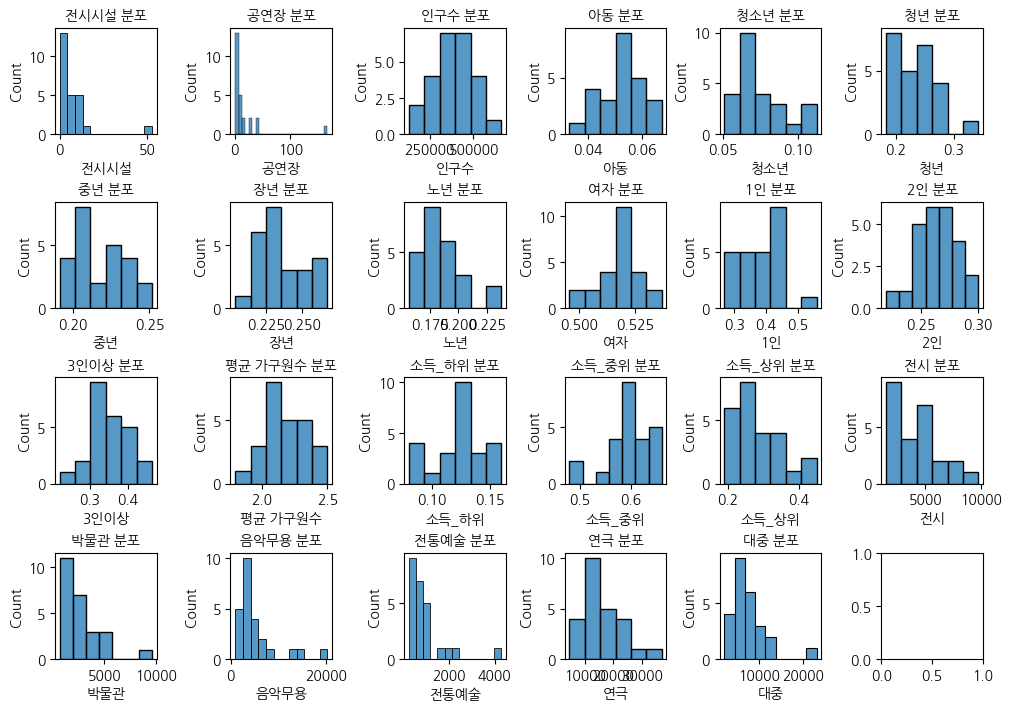

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(10,7), constrained_layout=True)
cols = seoul.columns
i=0

for r in range(4):
  for c in range(6):
    sns.histplot(data=seoul, x=cols[i], ax=ax[r][c])
    ax[r][c].set_title(cols[i]+' 분포', fontsize=10)
    i+=1
    if i==23:
      break

로그변환 대상 칼럼(왜곡 심한 칼럼)
- 전시시설, 공연장, 청년, 1인, 소득_중위, 소득_상위, 전시, 박물관, 음악무용, 전통예술, 연극, 대중

In [ ]:
seoul_log = seoul.copy()
log_list = ['전시시설','공연장','청년','1인','소득_중위','소득_상위','전시','박물관','음악무용','전통예술','연극','대중']

for col in log_list:
  seoul_log[col] = np.log1p(seoul[col])

seoul_log.head()

,전시시설,공연장,인구수,아동,청소년,청년,중년,장년,노년,여자,...,평균 가구원수,소득_하위,소득_중위,소득_상위,전시,박물관,음악무용,전통예술,연극,대중
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,2.484907,3.737670,559720,0.060925,0.112603,0.182545,0.251717,0.216083,0.158404,0.521995,...,2.3,0.08,0.392042,0.357674,8.868654,8.347206,9.921388,7.741009,10.515725,10.052108
강동구,1.098612,1.791759,465549,0.066579,0.084981,0.181966,0.234948,0.232506,0.181412,0.512221,...,2.3,0.09,0.470004,0.270027,8.285983,8.464299,8.331661,6.614074,9.542661,9.452734
강북구,1.386294,1.945910,291372,0.038916,0.065888,0.185581,0.191432,0.261779,0.238067,0.518948,...,2.1,0.14,0.506818,0.173953,7.777679,8.130470,7.170096,6.882278,9.205957,8.785760
강서구,1.609438,1.609438,567159,0.054114,0.073449,0.211797,0.229560,0.223920,0.183062,0.521404,...,2.1,0.10,0.470004,0.262364,8.217565,7.403706,8.246801,6.141151,9.359568,8.628570
관악구,1.609438,0.693147,497827,0.033038,0.051361,0.294534,0.195482,0.203954,0.173665,0.499565,...,1.8,0.12,0.506818,0.198851,8.358533,7.322282,8.245573,6.209366,10.017145,8.843193


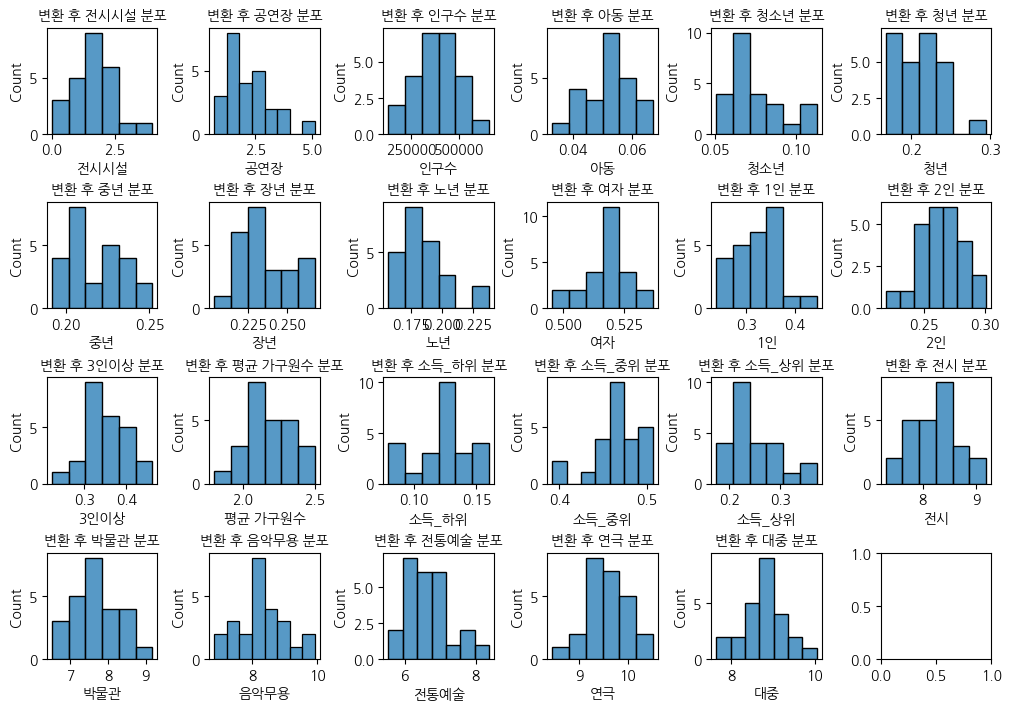

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(10,7), constrained_layout=True)
cols = seoul.columns
i=0

for r in range(4):
  for c in range(6):
    sns.histplot(data=seoul_log, x=cols[i], ax=ax[r][c])
    ax[r][c].set_title('변환 후 ' + cols[i] +' 분포', fontsize=10)
    i+=1
    if i==23:
      break

- 분포 왜곡 정도가 많이 개선된 모습

In [ ]:
seoul_log.to_csv('최종2_로그변환.csv')

### MinMax Scaling

In [ ]:
seoul_log.describe()

,전시시설,공연장,인구수,아동,청소년,청년,중년,장년,노년,여자,...,평균 가구원수,소득_하위,소득_중위,소득_상위,전시,박물관,음악무용,전통예술,연극,대중
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.629245,2.254605,385417.800000,0.052163,0.074320,0.210632,0.217238,0.235462,0.185839,0.517841,...,2.176000,0.121200,0.467578,0.246921,8.237276,7.696748,8.309531,6.656948,9.585166,8.782391
std,0.932235,1.045145,126373.164838,0.008540,0.016881,0.029501,0.016795,0.016290,0.020059,0.008969,...,0.153514,0.022605,0.029843,0.049384,0.469266,0.626313,0.743491,0.632133,0.486393,0.511812
min,0.000000,0.693147,131812.000000,0.033038,0.050838,0.167786,0.191432,0.203954,0.156261,0.495799,...,1.800000,0.080000,0.392042,0.173953,7.308351,6.512890,6.845193,5.534207,8.451590,7.639657
25%,1.098612,1.791759,308864.000000,0.045398,0.065460,0.185581,0.207104,0.223920,0.173665,0.512682,...,2.100000,0.110000,0.457425,0.215111,7.825708,7.256619,7.954802,6.223092,9.319842,8.483921
50%,1.609438,2.079442,389576.000000,0.053094,0.070035,0.211797,0.214645,0.232334,0.183109,0.518643,...,2.200000,0.120000,0.470004,0.231112,8.285983,7.691104,8.246801,6.584570,9.560741,8.785760
75%,2.302585,2.708050,465549.000000,0.057477,0.082266,0.228911,0.229560,0.246399,0.194520,0.522677,...,2.300000,0.140000,0.482426,0.277632,8.519199,8.130470,8.582921,6.882278,9.916848,9.058745
max,3.988984,5.123964,659661.000000,0.067217,0.112603,0.294534,0.251717,0.267477,0.238067,0.536646,...,2.500000,0.160000,0.506818,0.371564,9.188626,9.169169,9.921388,8.366963,10.515725,10.052108


- 범위에 큰 차이가 남 (예: 인구수 <-> 아동)
- 군집화 성능을 위해 0~1 사이로 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
seoul_scaled = seoul_log.copy()

scaler = MinMaxScaler(feature_range=(0,1))
seoul_scaled = scaler.fit_transform(seoul_log)

seoul_scaled = pd.DataFrame(seoul_scaled, index=seoul_log.index, columns=seoul_log.columns)
seoul_scaled.head()

,전시시설,공연장,인구수,아동,청소년,청년,중년,장년,노년,여자,...,평균 가구원수,소득_하위,소득_중위,소득_상위,전시,박물관,음악무용,전통예술,연극,대중
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,0.622942,0.687124,0.810664,0.815909,1.000000,0.116444,1.000000,0.190935,0.026197,0.641309,...,0.714286,0.000,0.000000,0.929715,0.829827,0.690558,1.000000,0.779030,1.000000,1.000000
강동구,0.275412,0.247948,0.632258,0.981339,0.552801,0.111874,0.721844,0.449474,0.307442,0.402029,...,0.714286,0.125,0.679252,0.486178,0.519941,0.734640,0.483216,0.381207,0.528585,0.751550
강북구,0.347531,0.282739,0.302283,0.171982,0.243677,0.140400,0.000000,0.910297,1.000000,0.566722,...,0.428571,0.750,1.000000,0.000000,0.249606,0.608964,0.105618,0.475887,0.365464,0.475078
강서구,0.403471,0.206800,0.824757,0.616623,0.366080,0.347232,0.632461,0.314301,0.327610,0.626843,...,0.428571,0.250,0.679252,0.447401,0.483554,0.335362,0.455630,0.214259,0.439883,0.409920
관악구,0.403471,0.000000,0.693409,0.000000,0.008478,1.000000,0.067170,0.000000,0.212743,0.092191,...,0.000000,0.500,1.000000,0.125993,0.558526,0.304709,0.455231,0.238340,0.758456,0.498885


In [ ]:
seoul_scaled.describe()

,전시시설,공연장,인구수,아동,청소년,청년,중년,장년,노년,여자,...,평균 가구원수,소득_하위,소득_중위,소득_상위,전시,박물관,음악무용,전통예술,연극,대중
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.408436,0.352409,0.480451,0.559547,0.380196,0.338046,0.428072,0.496000,0.361558,0.539619,...,0.537143,0.515000,0.658121,0.369249,0.494037,0.445683,0.476022,0.396342,0.549177,0.473682
std,0.233702,0.235881,0.239412,0.249868,0.273310,0.232752,0.278602,0.256437,0.245204,0.219582,...,0.219306,0.282566,0.260008,0.249908,0.249573,0.235786,0.241692,0.223151,0.235640,0.212155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.275412,0.247948,0.335422,0.361630,0.236748,0.140400,0.259966,0.314301,0.212743,0.413322,...,0.428571,0.375000,0.569658,0.208279,0.275150,0.279989,0.360708,0.243185,0.420637,0.349961
50%,0.403471,0.312876,0.488329,0.586800,0.310812,0.347232,0.385057,0.446758,0.328195,0.559257,...,0.571429,0.500000,0.679252,0.289248,0.519941,0.443558,0.455630,0.370792,0.537344,0.475078
75%,0.577236,0.454748,0.632258,0.715032,0.508834,0.482256,0.632461,0.668178,0.467681,0.658003,...,0.714286,0.750000,0.787486,0.524661,0.643974,0.608964,0.564895,0.475887,0.709865,0.588235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
seoul_scaled.to_csv('최종3_스케일링.csv')

# EDA

## 변수 간 관계 시각화

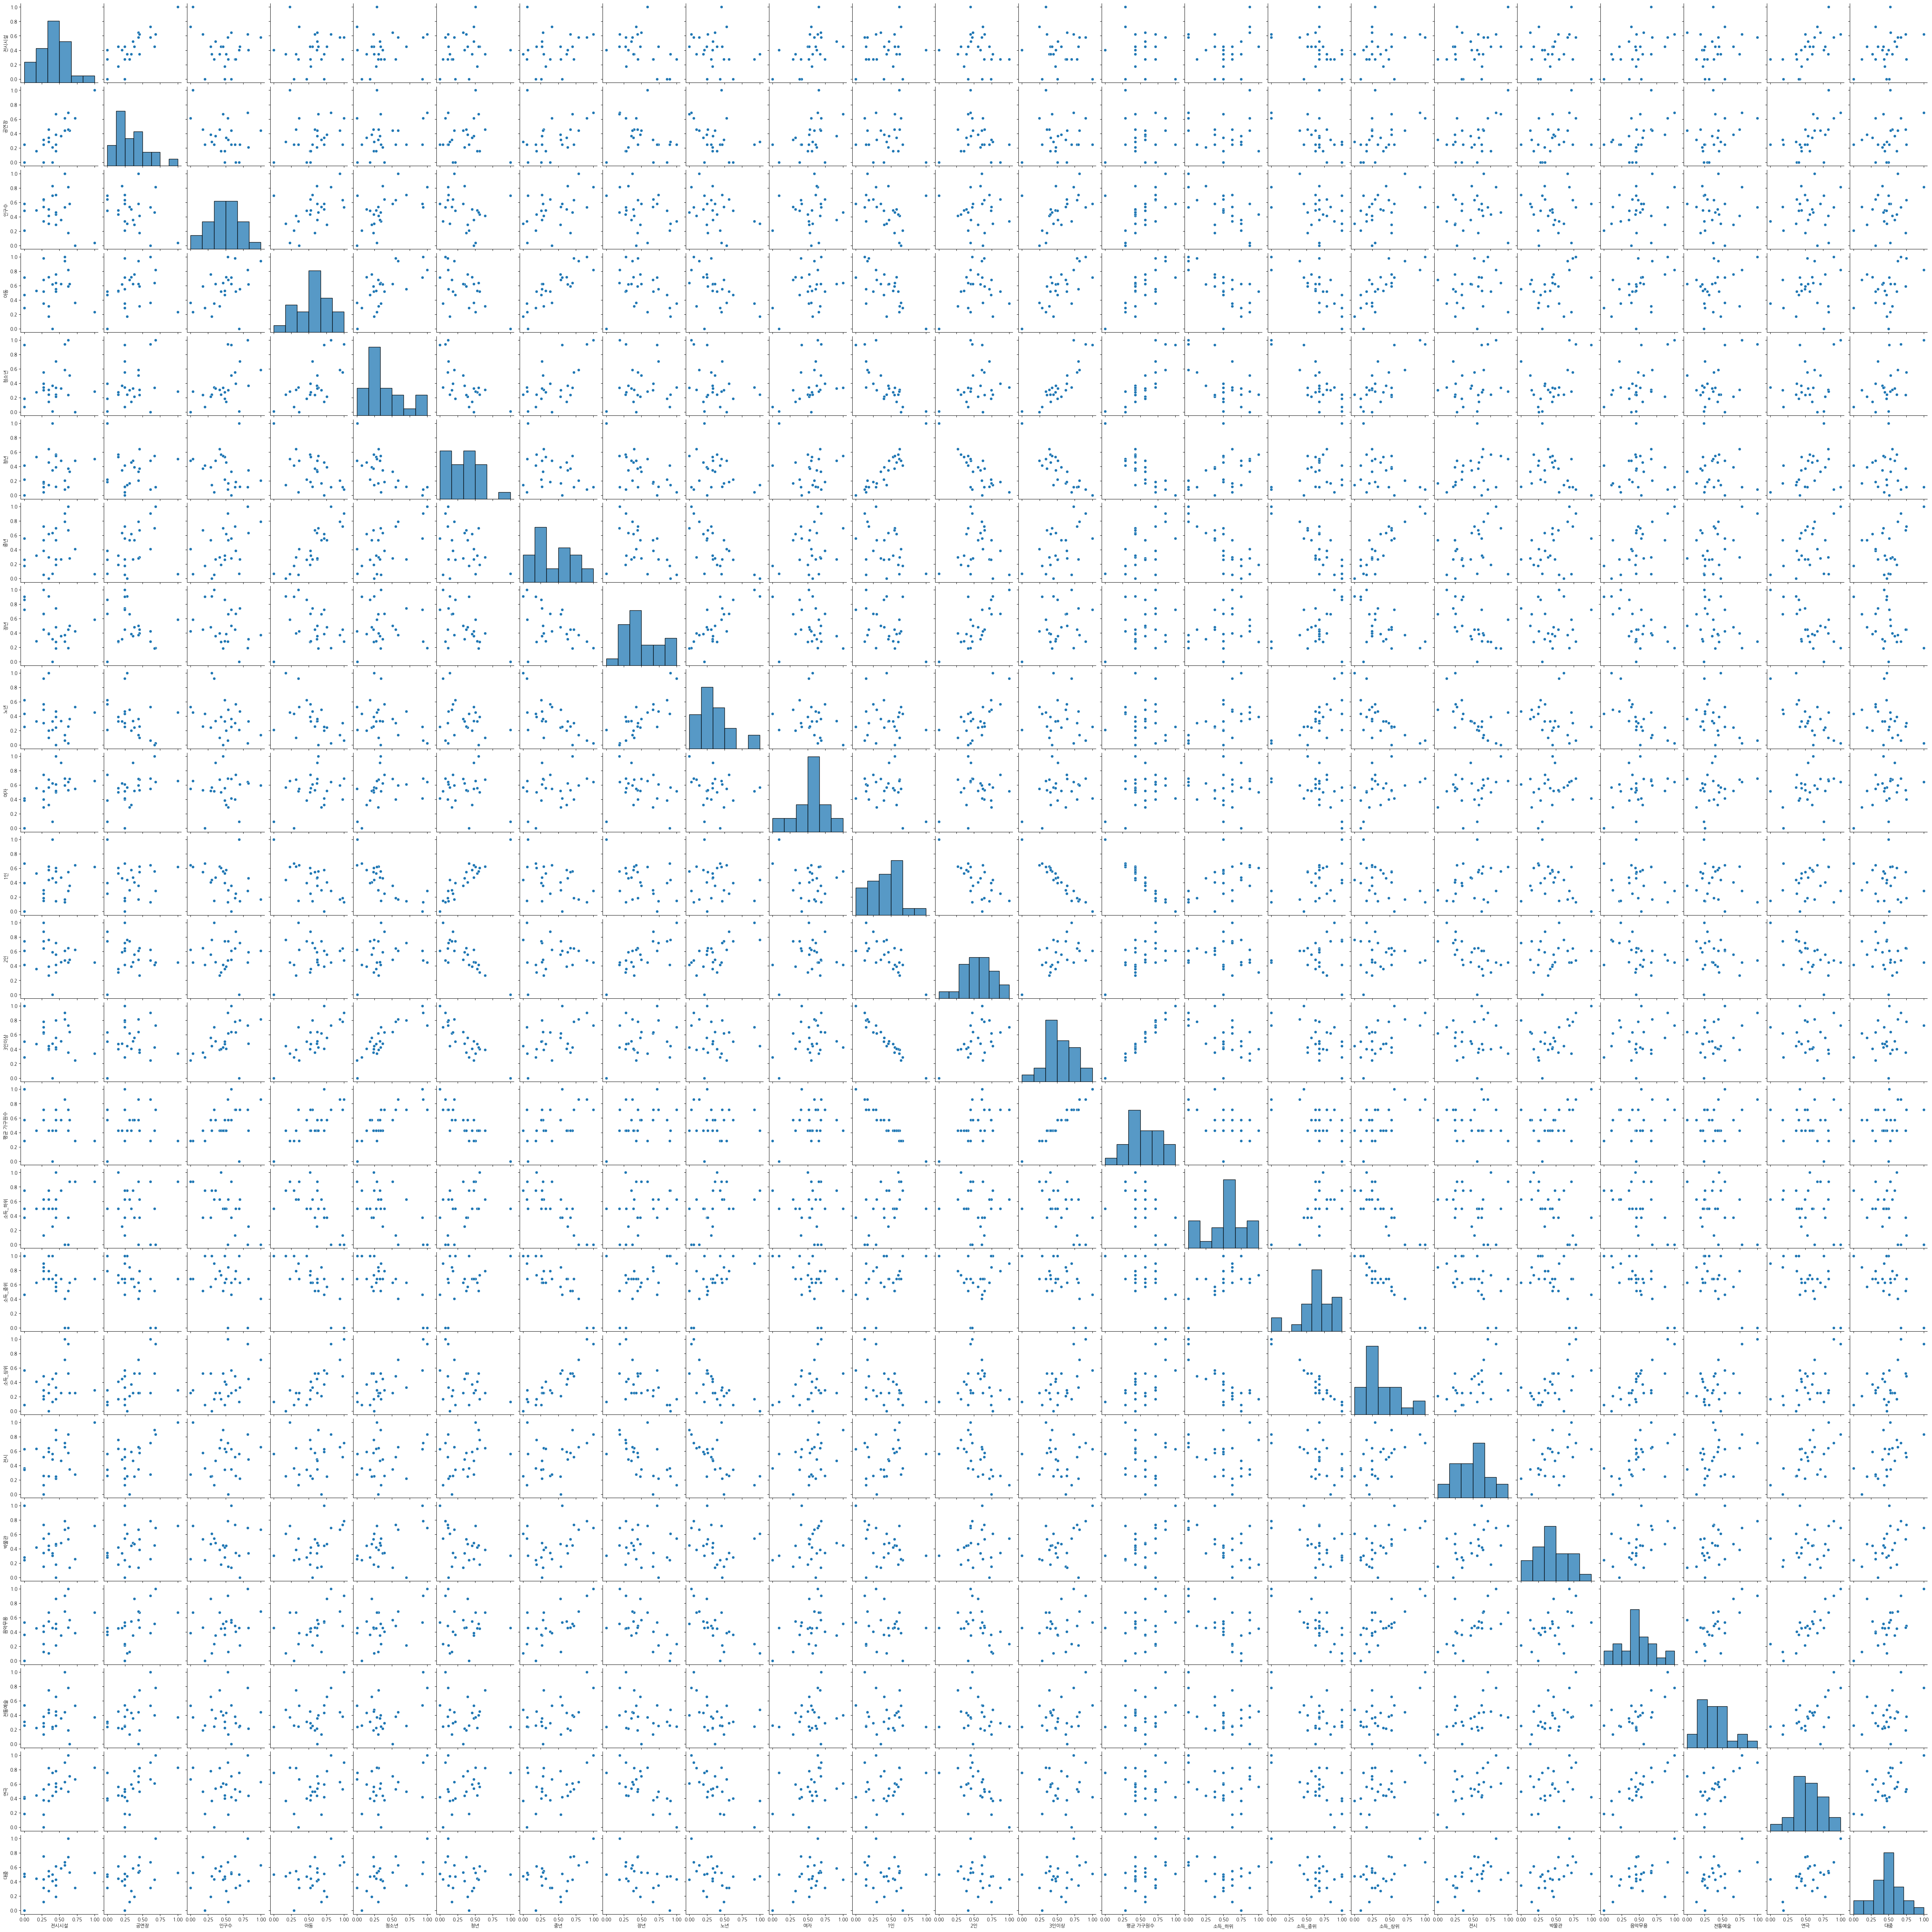

In [ ]:
sns.pairplot(seoul_scaled)
plt.show()

## 상관관계 히트맵

Text(0.5, 1.0, '상관관계')

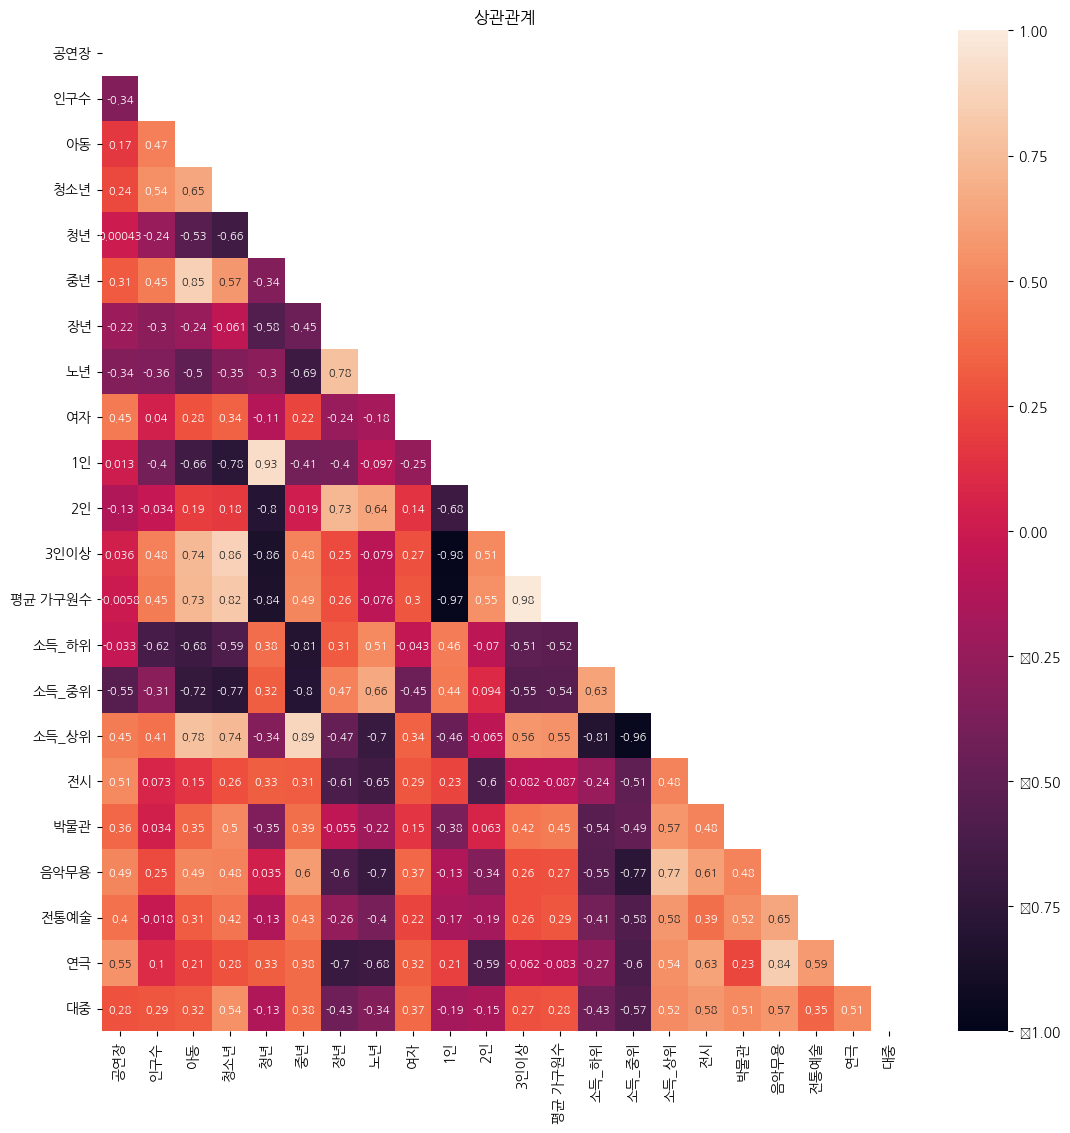

In [ ]:
plt.figure(figsize=(13,13))
mask = np.zeros_like(seoul_scaled.iloc[:,1:].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(seoul_scaled.iloc[:,1:].corr(), vmin=-1, vmax=1, annot=True, annot_kws = {'size' : 8}, mask=mask).set_title('상관관계')

# Modeling

## 필요 함수

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette_kmeans(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

## 군집화 모델링 시도들

#### **1. 원본 데이터**
- 칼럼 전처리 전, 최초 데이터

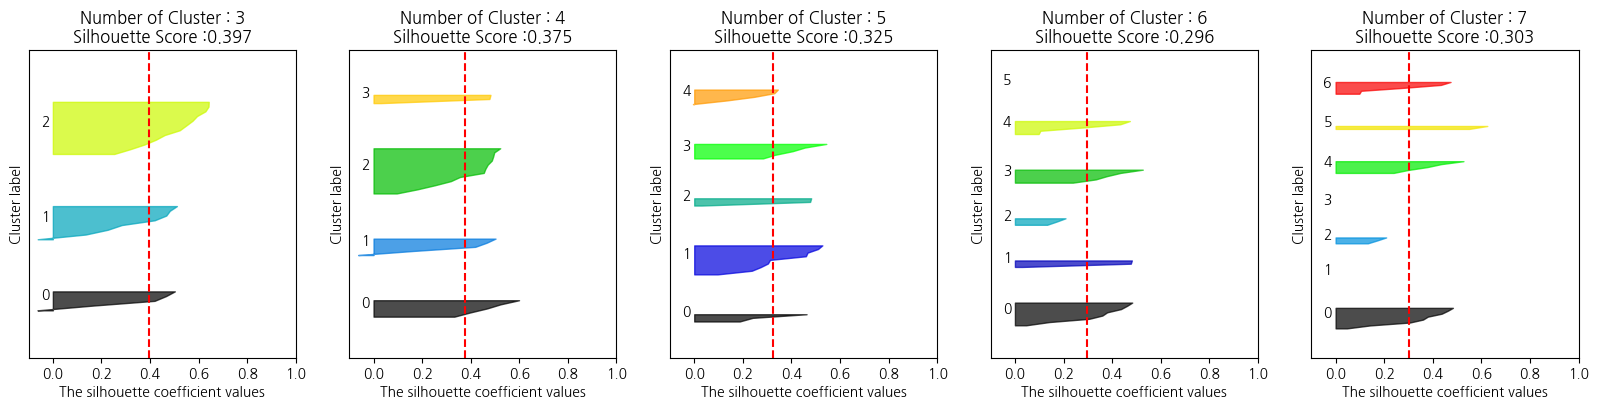

In [ ]:
visualize_silhouette_kmeans([3,4,5,6,7], seoul_df)

- 실루엣 계수의 평균은 약 0.3~0.4에 가까운 성능을 보임

#### **2. 전처리 후 데이터**
- 칼럼 정리: 참여도 변수 생성, 인구/가구수 비율 변환, 소득 범주화 등
- 스케일링 적용 전

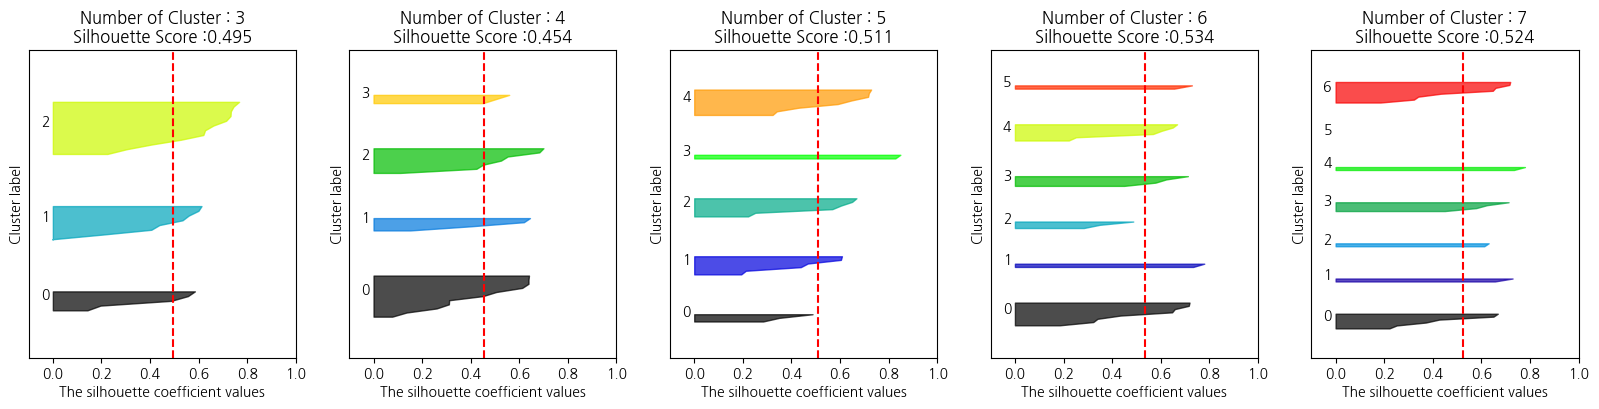

In [ ]:
visualize_silhouette_kmeans([3,4,5,6,7], seoul)

- 실루엣 계수의 평균은 약 0.45~0.55에 가까운 성능을 보임
  - 전반적으로 0.1~0.2 이상 높아짐

  => **칼럼 전처리가 군집화 성능 향상에 도움이 되었음**을 알 수 있음
- 높은 실루엣 계수를 보이기는 했으나, 본 데이터는 변수별 스케일 편차가 큼
  
  => 스케일링 전 데이터는 거리 기반 군집화인 K-Means 알고리즘에 **적합하지 않다**고 판단

#### **3. 스케일링 후 데이터**
- 로그변환, MinMax scaling 처리

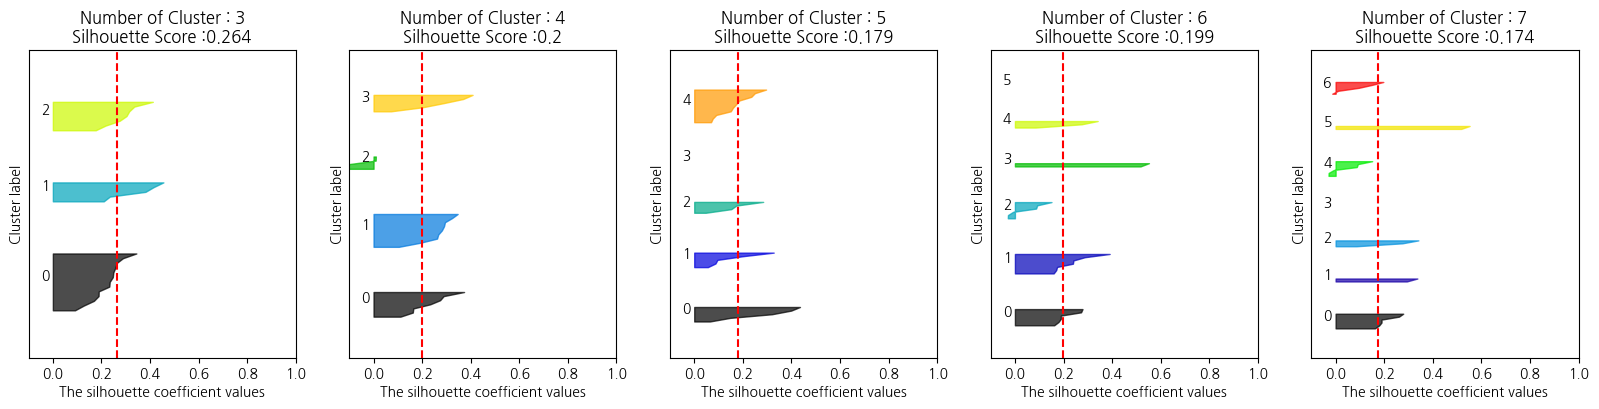

In [ ]:
visualize_silhouette_kmeans([3,4,5,6,7], seoul_scaled)

- 실루엣 계수의 평균은 약 0.15~0.25 수준으로 낮은 성능을 보임
  - 전반적으로 크게 하락함
- 군집화 수행하기에 너무 많은 칼럼 수, 각 칼럼끼리 관계있는 경우가 많음 (상관계수 높은)

  => 변수의 개수를 줄이는 방법을 고민함 -> 차원축소 시도

#### **4. 차원축소 후 데이터**
- PCA 알고리즘을 이용한 차원축소 진행
- 여러 차원 크기로 군집화 실험한 결과, 가장 좋은 성능을 보인 **`n_cluster=4`**로 선정

##### 차원축소 (PCA)
- 군집화 수행하기에 너무 많은 칼럼 수
- 각 칼럼끼리 관계있는 경우가 많음 (상관계수 높은)

  => PCA로 차원축소 후 군집화 진행

In [ ]:
seoul_pca = seoul_scaled.copy()

# 차원 수 선택
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=0).fit(seoul_pca)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.8) + 1
print('선택할 차원 수 :', d)
print('설명 가능한 변동성')
print(cumsum)

선택할 차원 수 : 4
설명 가능한 변동성
[0.43654463 0.67509909 0.77134769 0.82272519 0.86727286 0.89685673
 0.92292885 0.94385195 0.95695121 0.9690028 ]


In [ ]:
# 차원축소 수행
pca = PCA(n_components=4, random_state=0)
seoul_pca = pca.fit_transform(seoul_pca)

- 차원 수: 4개 선정

##### 군집화 (K-Means)

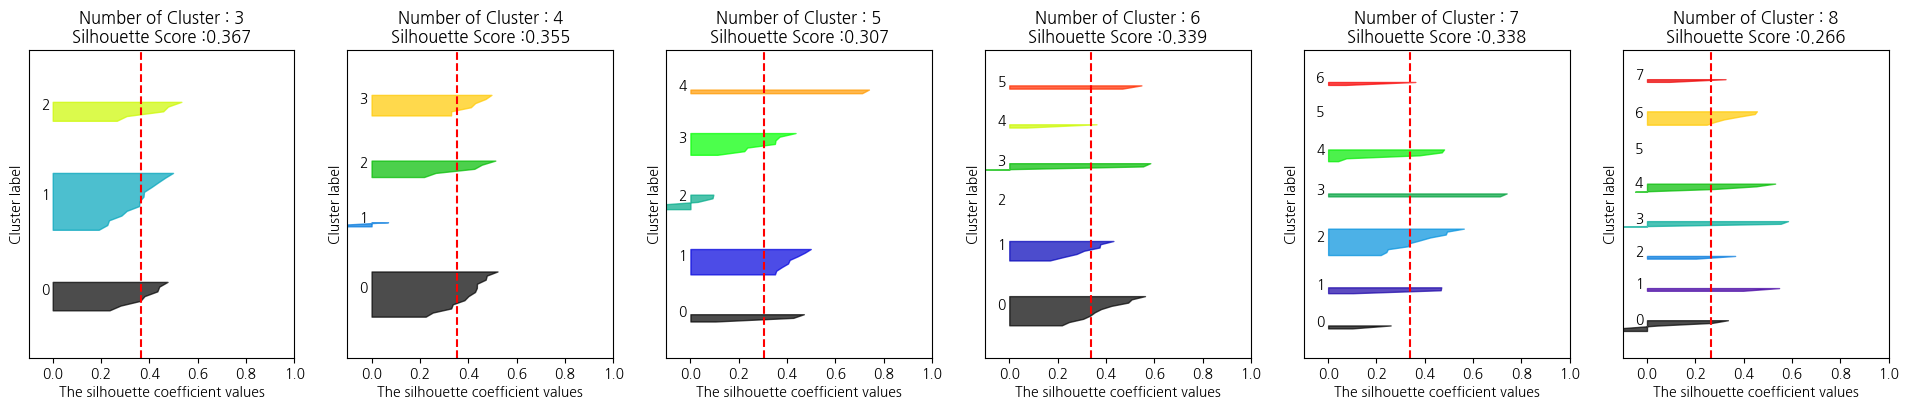

In [ ]:
visualize_silhouette_kmeans([3,4,5,6,7,8], seoul_pca)

- 실루엣 계수의 평균은 약 0.35의 성능을 보임
  - 전반적인 수치가 다시 향상됨

  => **차원축소가 군집화 성능 향상에 도움이 되었음**을 알 수 있음

##### **군집 개수 선정**
- **`n_cluster=3, 4`**: 25개의 자치구를 분류하기에는 부족한 개수라고 판단
- **`n_cluster=5, 6`**: 실루엣 계수가 음수가 되는 데이터가 있기 때문에 적절한 군집화가 수행되지 않았다고 판단

  **=> `n_cluster=7`을 최종 군집화 모델로 선정**

In [ ]:
# 군집화 수행
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=7, random_state=0)
labels = kmeans.fit_predict(seoul_pca)

In [ ]:
# 군집화 결과
seoul_cluster = seoul.copy()
seoul_cluster['군집'] = labels
seoul_cluster['군집'] = seoul_cluster[['군집']]
seoul_cluster[['군집']].sort_values(by='군집')

,군집
자치구,
강북구,0
금천구,0
강동구,1
양천구,1
송파구,1
마포구,2
강서구,2
용산구,2
광진구,2


In [ ]:
# 군집별 개수
seoul_cluster.groupby('군집')['군집'].count()

군집
0     2
1     3
2    10
3     2
4     5
5     1
6     2
Name: 군집, dtype: int64

#### **5. 추가 군집 세분화**
- 군집 분석 과정에서, 군집 2에 10개의 자치구가 들어있어 군집 특성이 모호해지는 문제가 발생함

  => 군집 2를 대상으로 추가 군집화 모델링을 수행하여 군집 세분화

In [ ]:
cluster2 = seoul_scaled[seoul_cluster['군집']==2]
cluster2

,전시시설,공연장,인구수,아동,청소년,청년,중년,장년,노년,여자,...,평균 가구원수,소득_하위,소득_중위,소득_상위,전시,박물관,음악무용,전통예술,연극,대중
자치구,,,,,,,,,,,,,,,,,,,,,
강서구,0.403471,0.206800,0.824757,0.616623,0.366080,0.347232,0.632461,0.314301,0.327610,0.626843,...,0.428571,0.250,0.679252,0.447401,0.483554,0.335362,0.455630,0.214259,0.439883,0.409920
광진구,0.347531,0.454748,0.415105,0.315335,0.310812,0.643605,0.293856,0.397113,0.102135,0.676116,...,0.428571,0.625,0.787486,0.248926,0.643974,0.386662,0.670417,0.745738,0.825602,0.550251
동대문구,0.449177,0.156438,0.432698,0.518563,0.241578,0.565749,0.191432,0.275523,0.393420,0.499513,...,0.428571,1.000,0.733537,0.167303,0.756909,0.180344,0.448290,0.452512,0.559837,0.616347
동작구,0.173765,0.156438,0.488329,0.527604,0.276030,0.531528,0.319712,0.285986,0.328195,0.559257,...,0.428571,0.500,0.624627,0.408324,0.630556,0.416765,0.454246,0.223554,0.444784,0.445467
마포구,0.449177,0.670399,0.460643,0.635230,0.338687,0.548911,0.700091,0.184892,0.000000,1.000000,...,0.428571,0.500,0.514339,0.524661,0.893824,0.448352,0.515025,0.398660,0.610244,0.427037
서대문구,0.521296,0.363237,0.357235,0.621299,0.328113,0.480457,0.268321,0.355679,0.333262,0.912146,...,0.571429,0.750,0.679252,0.248926,0.466536,0.481692,0.354567,0.355964,0.537344,0.588235
성동구,0.449177,0.384748,0.288806,0.755138,0.213645,0.391248,0.532367,0.481499,0.244239,0.519767,...,0.571429,0.375,0.569658,0.524661,0.244832,0.464991,0.863319,0.657153,0.781299,0.192660
성북구,0.643008,0.439176,0.577985,0.620489,0.508834,0.330257,0.282859,0.500165,0.363990,0.687307,...,0.571429,0.875,0.624627,0.248926,0.345686,0.135497,0.564895,0.000000,0.709865,0.527509
영등포구,0.347531,0.339458,0.504178,0.715284,0.140348,0.457196,0.620891,0.384677,0.198659,0.326834,...,0.428571,0.500,0.679252,0.368942,0.587051,0.443558,0.548346,0.432366,0.596848,0.271903


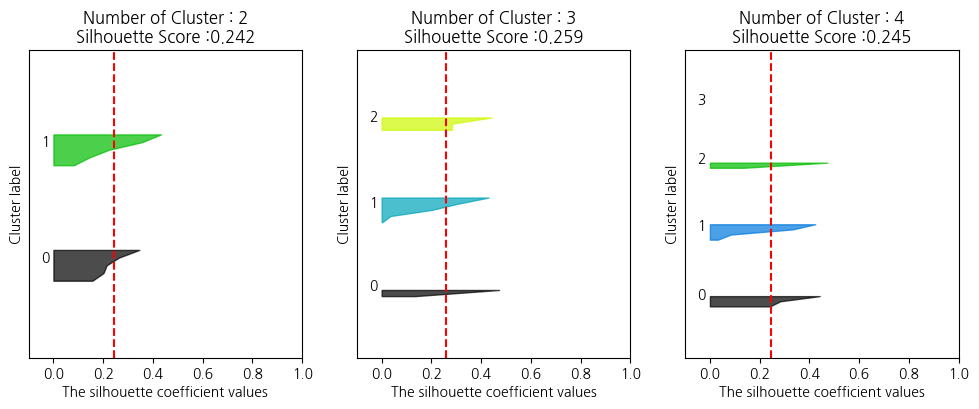

In [ ]:
# 차원축소 수행
pca = PCA(n_components=3, random_state=0)
cluster2_pca = pca.fit_transform(cluster2)

# 군집 개수 선택
visualize_silhouette_kmeans([2,3,4], cluster2_pca)

- **`n_cluster=2`**와 **`n_cluster=3`**의 실루엣 계수의 차이가 크지 않고,

  10개의 자치구를 나누기에는 2개의 군집으로 충분하다고 판단하여 **`n_cluster=2`**를 선정

In [ ]:
# 군집화 수행
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=2, random_state=0)
labels_2 = kmeans.fit_predict(cluster2_pca)

tmp_df = pd.DataFrame(labels_2, columns=['군집'], index=cluster2.index)
tmp_df

,군집
자치구,
강서구,0
광진구,1
동대문구,1
동작구,1
마포구,0
서대문구,1
성동구,0
성북구,1
영등포구,0


- 광진구, 동대문구, 동작구, 서대문구, 성북구 : 군집 2-1
- 강서구, 마포구, 성동구, 영등포구, 용산구 : 군집 2-2 (DataFrame에서는 군집 7로 표현)

In [ ]:
seoul_cluster.loc[seoul_cluster.index.isin(['마포구', '성동구', '영등포구', '용산구', '강서구']), '군집'] = 7
seoul_cluster[['군집']].sort_values(by='군집').astype('int64')

,군집
자치구,
강북구,0
금천구,0
강동구,1
양천구,1
송파구,1
광진구,2
성북구,2
동대문구,2
동작구,2


In [ ]:
seoul_cluster['군집'].value_counts()

군집
7    5
2    5
4    5
1    3
3    2
0    2
6    2
5    1
Name: count, dtype: int64

In [ ]:
seoul_cluster['군집']

자치구
강남구     3
강동구     1
강북구     0
강서구     7
관악구     5
광진구     2
구로구     4
금천구     0
노원구     4
도봉구     4
동대문구    2
동작구     2
마포구     7
서대문구    2
서초구     3
성동구     7
성북구     2
송파구     1
양천구     1
영등포구    7
용산구     7
은평구     4
종로구     6
중구      6
중랑구     4
Name: 군집, dtype: int32

## 군집화 결과

(25, 2)


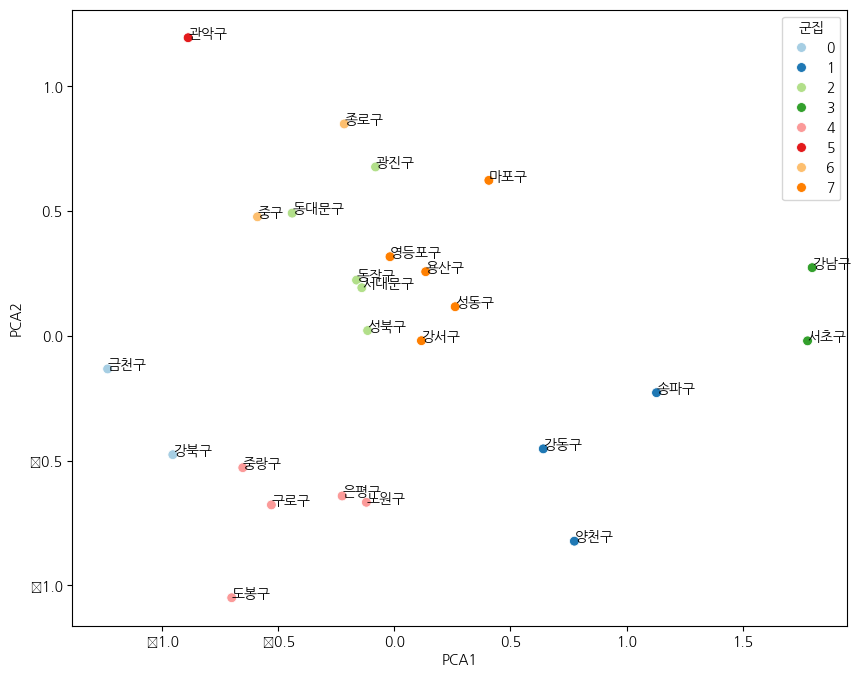

In [ ]:
# 2차원 시각화

## 2차원 시각화를 위한 임시 PCA
pca = PCA(n_components=2)
tmp_pca = pca.fit_transform(seoul_scaled)
print(tmp_pca.shape)

pca_columns=['pca_1','pca_2']
tmp_pca_df = pd.DataFrame(tmp_pca, columns=pca_columns)
tmp_pca_df = pd.concat([tmp_pca_df, seoul_cluster['군집'].reset_index(drop=True)], axis=1)

## 그래프 그리기
plt.figure(figsize=(10,8))
sns.scatterplot(data=tmp_pca_df, x='pca_1', y='pca_2', hue='군집', s=50, palette=sns.color_palette("Paired"))

plt.xlabel('PCA1')
plt.ylabel('PCA2')

for i, name in enumerate(seoul_scaled.index):
    plt.text(tmp_pca[i, 0], tmp_pca[i, 1], name, fontsize=10)

## 지도 시각화

In [ ]:
!pip install geopandas
!pip install fiona
!pip install pyogrio

In [ ]:
import geopandas as gpd
from fiona.crs import from_epsg
from osgeo import gdal

gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')

In [ ]:
gdf_admin_gu_pg = gpd.read_file('/content/drive/MyDrive/ESAA_dataset/LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11_202405.shp', encoding='cp949')
gdf_admin_gu_pg['SGG_NM'] = gdf_admin_gu_pg['SGG_NM'].str.split().str[1]
gdf_admin_gu_pg2 = gdf_admin_gu_pg.to_crs(epsg=3857)

gp = seoul_cluster[['군집']]
gdf_admin_gu_pg3 = gdf_admin_gu_pg2.rename(columns={"SGG_NM":'자치구'}) # gdf_admin_gu_pg2: gp와 컬럼명 동일하게 변경
gdf_gu = pd.concat([gdf_admin_gu_pg3.set_index('자치구'), gp], axis=1).reset_index() # gp와 gdf_admin_gu_pg2 합치기

columns = ["자치구", "군집"]
gdf_gu2 = gpd.GeoDataFrame(gdf_gu[columns], geometry=gdf_gu.geometry, crs=from_epsg(3857))
gdf_gu2["center"] = gdf_gu2.geometry.centroid

gdf_gu2.head()

,자치구,군집,geometry,center
0,종로구,6,"POLYGON ((14134800.869 4527461.530, 14134783.0...",POINT (14135053.705 4522358.371)
1,중구,6,"POLYGON ((14140186.782 4518819.988, 14140187.0...",POINT (14137126.952 4517473.958)
2,용산구,7,"POLYGON ((14134513.512 4516696.061, 14134527.3...",POINT (14135340.981 4513437.026)
3,성동구,7,"POLYGON ((14142420.966 4519179.646, 14142422.2...",POINT (14142147.089 4516196.180)
4,광진구,2,"POLYGON ((14148896.757 4519204.882, 14148964.5...",POINT (14147124.422 4515592.549)


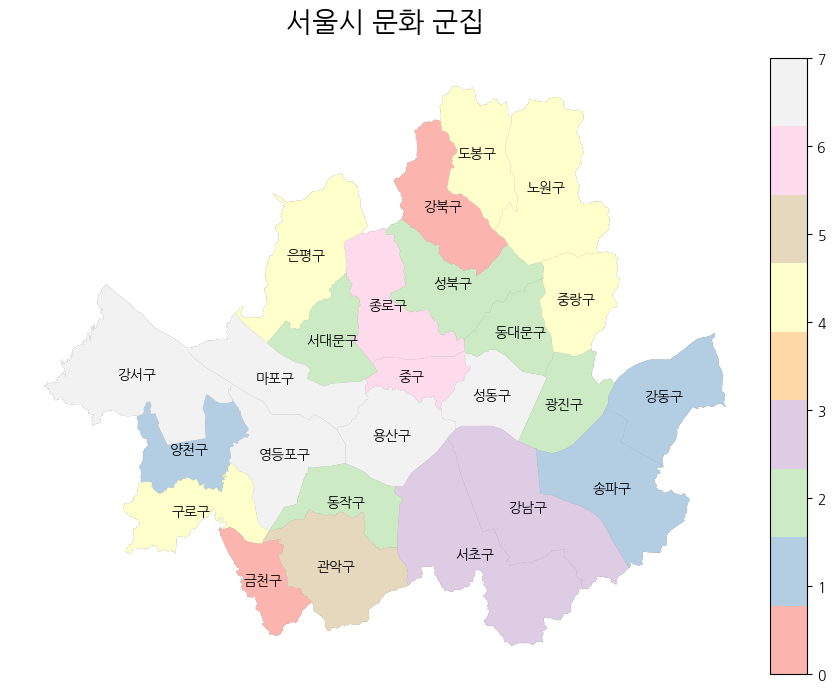

In [ ]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig = plt.figure(figsize=(13, 8))
ax = fig.subplots(1, 1)
gdf_gu2.plot(color='gray', ax=ax)
ax.set_axis_off()

# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# 단계구분도
gdf_gu2.plot("군집", ax=ax, legend=True,  cax=cax, cmap='Pastel1')
ax.set_title("서울시 문화 군집", fontsize=20, pad=20)

for idx in range(len(gdf_gu2)):
  lat = gdf_gu2.center.iloc[idx].xy[0][0]
  long = gdf_gu2.center.iloc[idx].xy[1][0]

  if gdf_gu2["군집"].iloc[idx] >= 400000:
    c = "white"
  else:
    c = 'black'
  ax.text(lat-1500, long-300, gdf_gu2["자치구"].iloc[idx], fontsize=10, color=c,  fontweight='bold')

# 결과 분석

## 시설

Text(0.5, 1.0, '공연장 수')

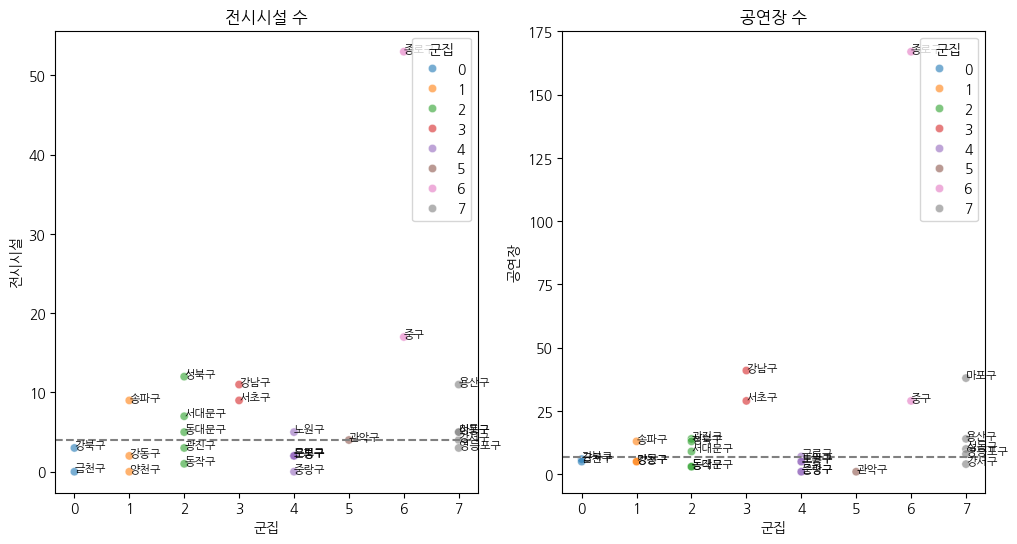

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data=seoul_cluster, x='군집', y='전시시설', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"), ax=ax1)
for i, txt in enumerate(seoul_cluster.index):
    ax1.annotate(txt, (seoul_cluster['군집'][i], seoul_cluster['전시시설'][i]), fontsize=8)
ax1.axhline(seoul_cluster['전시시설'].median(), color='gray', linestyle='--', label='Median')
ax1.set_xticks(ticks=[0,1,2,3,4,5,6,7])
ax1.set_title('전시시설 수')

sns.scatterplot(data=seoul_cluster, x='군집', y='공연장', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"), ax=ax2)
for i, txt in enumerate(seoul_cluster.index):
    ax2.annotate(txt, (seoul_cluster['군집'][i], seoul_cluster['공연장'][i]), fontsize=8)
ax2.axhline(seoul_cluster['공연장'].median(), color='gray', linestyle='--', label='Median')
ax2.set_xticks(ticks=[0,1,2,3,4,5,6,7])
ax2.set_title('공연장 수')

## 연령대

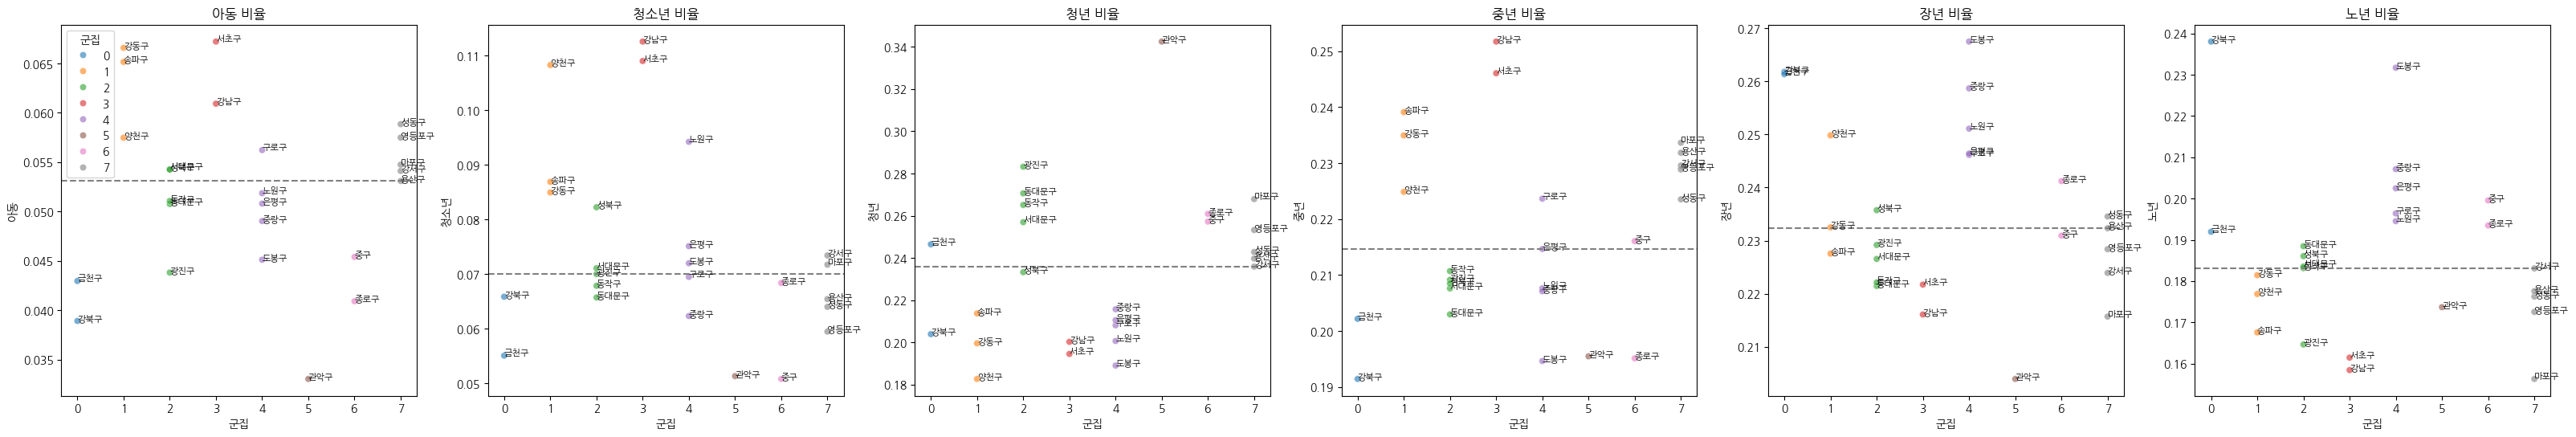

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(40, 6))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
cols = ['아동', '청소년', '청년', '중년', '장년', '노년']

for i in range(6):
  sns.scatterplot(data=seoul_cluster, x='군집', y=cols[i], hue='군집', alpha=0.6, palette=sns.color_palette("tab10"), ax=axs[i])
  for j, txt in enumerate(seoul_cluster.index):
      axs[i].annotate(txt, (seoul_cluster['군집'][j], seoul_cluster[cols[i]][j]), fontsize=8)
  axs[i].axhline(seoul_cluster[cols[i]].median(), color='gray', linestyle='--', label='Median')
  axs[i].set_xticks(ticks=[0,1,2,3,4,5,6,7])
  axs[i].set_title(cols[i]+' 비율')
  if i!=0:
    axs[i].get_legend().set_visible(False)

## 성비

Text(0.5, 1.0, '여자 비율')

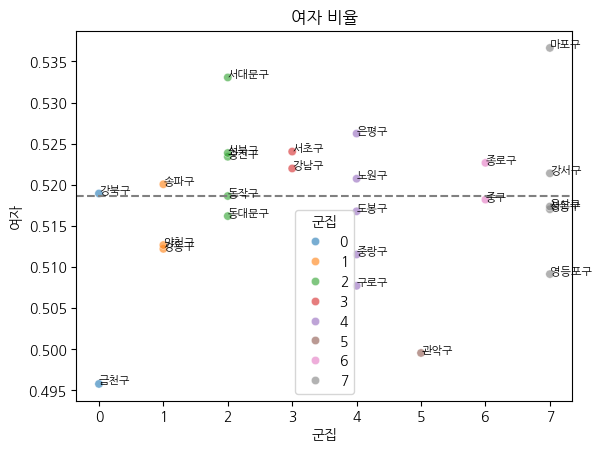

In [ ]:
sns.scatterplot(data=seoul_cluster, x='군집', y='여자', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
for j, txt in enumerate(seoul_cluster.index):
      plt.annotate(txt, (seoul_cluster['군집'][j], seoul_cluster['여자'][j]), fontsize=8)
plt.xticks(ticks=[0,1,2,3,4,5,6,7])
plt.axhline(seoul_cluster['여자'].median(), color='gray', linestyle='--', label='Median')
plt.title('여자 비율')

## 인구수

Text(0.5, 1.0, '인구수')

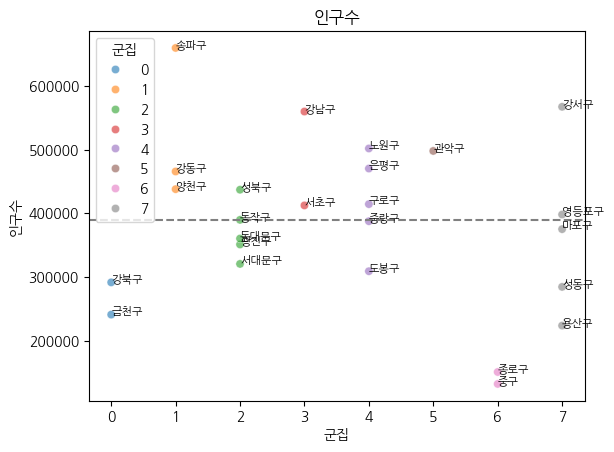

In [ ]:
sns.scatterplot(data=seoul_cluster, x='군집', y='인구수', hue='군집', alpha=0.6, palette=sns.color_palette("tab10"))
for j, txt in enumerate(seoul_cluster.index):
      plt.annotate(txt, (seoul_cluster['군집'][j], seoul_cluster['인구수'][j]), fontsize=8)
plt.xticks(ticks=[0,1,2,3,4,5,6,7])
plt.axhline(seoul_cluster['인구수'].median(), color='gray', linestyle='--', label='Median')
plt.title('인구수')

## 가구원수

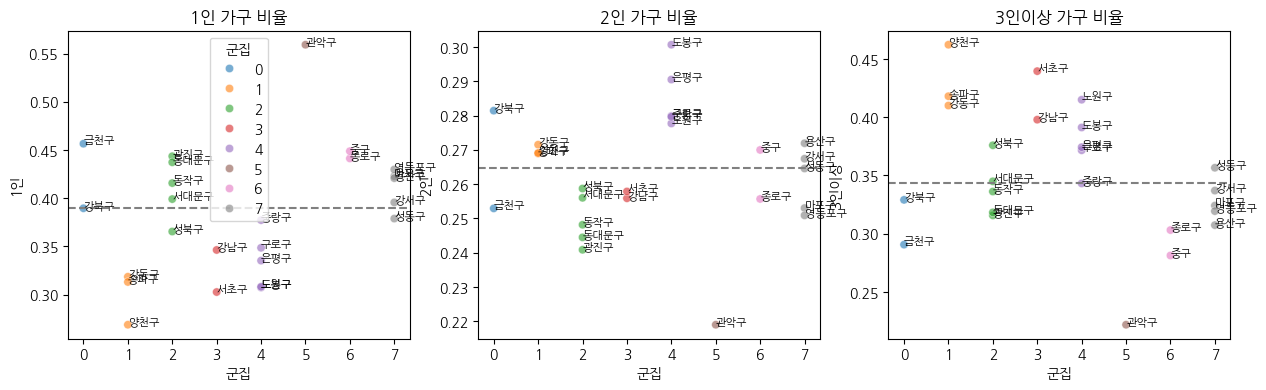

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
axs = [ax1, ax2, ax3]
cols = ['1인', '2인', '3인이상']

for i in range(3):
  sns.scatterplot(data=seoul_cluster, x='군집', y=cols[i], hue='군집', alpha=0.6, palette=sns.color_palette("tab10"), ax=axs[i])
  for j, txt in enumerate(seoul_cluster.index):
      axs[i].annotate(txt, (seoul_cluster['군집'][j], seoul_cluster[cols[i]][j]), fontsize=8)
  axs[i].axhline(seoul_cluster[cols[i]].median(), color='gray', linestyle='--', label='Median')
  axs[i].set_xticks(ticks=[0,1,2,3,4,5,6,7])
  axs[i].set_title(cols[i]+' 가구 비율')
  if i!=0:
    axs[i].get_legend().set_visible(False)

## 소득

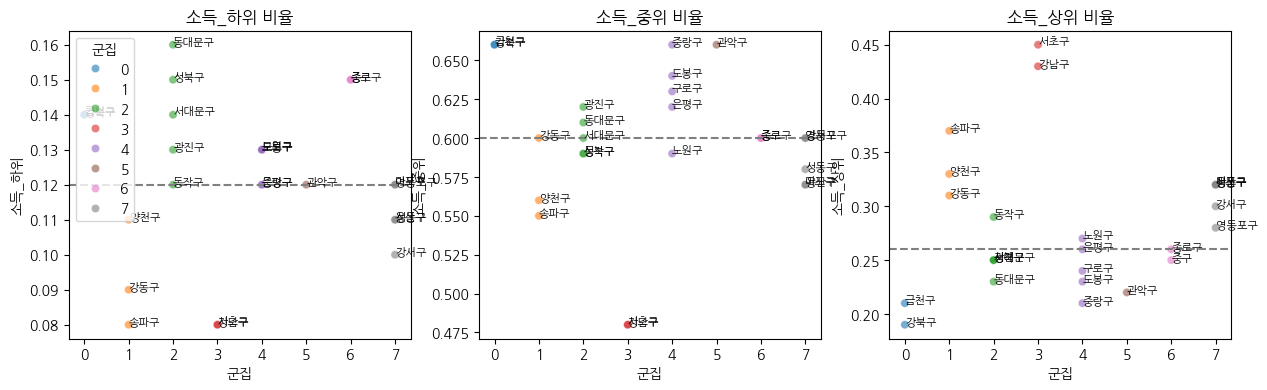

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
axs = [ax1, ax2, ax3]
cols = ['소득_하위', '소득_중위', '소득_상위']

for i in range(3):
  sns.scatterplot(data=seoul_cluster, x='군집', y=cols[i], hue='군집', alpha=0.6, palette=sns.color_palette("tab10"), ax=axs[i])
  for j, txt in enumerate(seoul_cluster.index):
      axs[i].annotate(txt, (seoul_cluster['군집'][j], seoul_cluster[cols[i]][j]), fontsize=8)
  axs[i].axhline(seoul_cluster[cols[i]].median(), color='gray', linestyle='--', label='Median')
  axs[i].set_xticks(ticks=[0,1,2,3,4,5,6,7])
  axs[i].set_title(cols[i]+' 비율')
  if i!=0:
    axs[i].get_legend().set_visible(False)

## 참여도

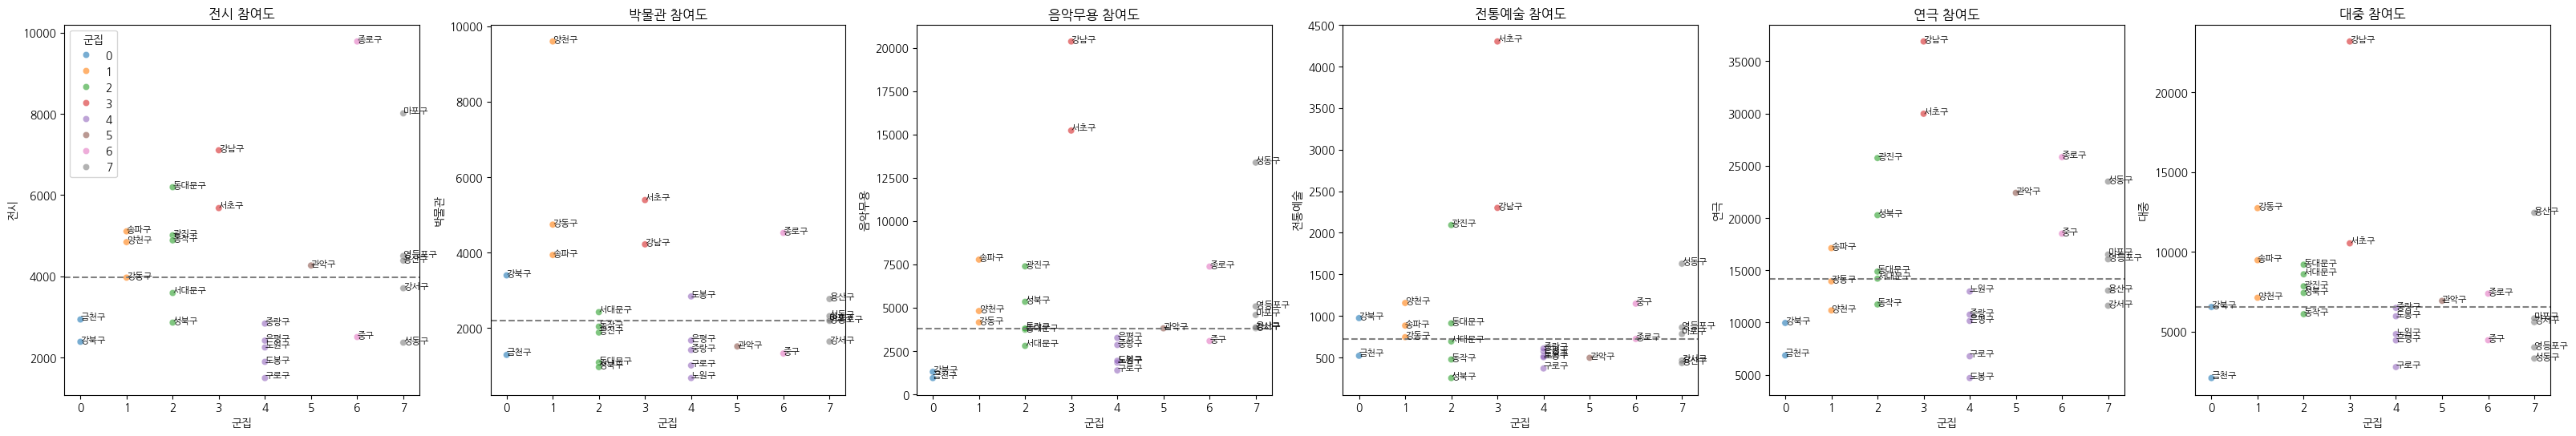

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(40, 6))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
cols = ['전시', '박물관', '음악무용', '전통예술', '연극', '대중']

for i in range(6):
  sns.scatterplot(data=seoul_cluster, x='군집', y=cols[i], hue='군집', alpha=0.6, palette=sns.color_palette("tab10"), ax=axs[i])
  for j, txt in enumerate(seoul_cluster.index):
      axs[i].annotate(txt, (seoul_cluster['군집'][j], seoul_cluster[cols[i]][j]), fontsize=8)
  axs[i].axhline(seoul_cluster[cols[i]].median(), color='gray', linestyle='--', label='Median')
  axs[i].set_xticks(ticks=[0,1,2,3,4,5,6,7])
  axs[i].set_title(cols[i]+' 참여도')
  if i!=0:
    axs[i].get_legend().set_visible(False)